## Lenker til prosjektet

- GitHub-repositorium: https://github.com/pialoschbrandt/streamlit#
- Streamlit-app: https://appgit-2khm3anafqsdgqrdfpx7vz.streamlit.app

In [1]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

1. Hva er oppgaven?
Hensikten med dette prosjektet er å lage en fungerende Streamlitapp som visualiserer data hentet fra 
open-meteo-subset.csv. 

2. Hvordan ble dette gjennomført?
Jeg skule gjerne sakt at jeg satte meg ned, modellerte appen og laget en strukturert plan for hvordan impliumenteringen skulle skje - men dette er ikke realiteten. Prosjektet ble gjennomført ved å prøve og faile. 
Mye av tiden gikk til å finne ut hva de ulike dokumentene/filene er, hvordan ting henger sammen og egentlig 
faktisk forstå pensum som blir lagt frem i forelesning. Dette ble gjort parallelt med impliemnteringen og det var
myr prøving og failing.

3. Hva var utfordrende?
Og debugge når jeg får feilmeldinger. Spesielt på tanke med visualisering. Jeg visste ikke på forhånd at flere av 
biblitoekene "forventer" et viss input format. Dette gir selvfølgelig mening i ettertid, men alt som er ukjent er 
krevende i starten. Jeg håper å få enda mer trening i hvordan man lager visualiseringer som også håndterer feilhåndtering i større grad og gjør programmet mer robust.


4. Hvordan ble AI brukt?
AI ble brukt som en samtalepartner og spørrepartner. Jeg forsøkte og først gjøre ting ved å se på tutorials eller inspirasjon fra forelesning. Ofte trengte jeg enda mer gjennomgang av hva de ulike linjene i koden faktisk gjør. Her er chat god! Hvis jeg ikke visste kommandoer for de ulike tingene var det fint å spørre "Jeg ønsker å lage dette og dette hva kan jeg bruke". Til del 4 ble AI i stor grad brukt, jeg har ikke stilt meg kritisk til outputene som vises her, men vet at ChatGPT er trent på data fra internettet deriblant Open Weather som ligger åpent for alle. Jeg har derfor valgt å stole blindt på dette. 

5. Hva skal jeg gjøre annerledes neste innlevering?
Tegne opp og lage en plan/utkast for gjennomføringen. Forstå i enda bedre grad hvordan man setter opp plots/visualiseringene. 


# 1.1 Utforske datasettet

In [3]:
# Leser og lagrer csv-filen
df = pd.read_csv("open-meteo-subset.csv")


In [4]:
#Sjekker de første radene i datasettet
df.head()

,time,temperature_2m (°C),precipitation (mm),wind_speed_10m (m/s),wind_gusts_10m (m/s),wind_direction_10m (°)
0,2020-01-01T00:00,-2.2,0.1,9.6,21.3,284
1,2020-01-01T01:00,-2.2,0.0,10.6,23.0,282
2,2020-01-01T02:00,-2.3,0.0,11.0,23.5,284
3,2020-01-01T03:00,-2.3,0.0,10.6,23.3,284
4,2020-01-01T04:00,-2.7,0.0,10.6,22.8,284


In [5]:
#Utforsker kolonnene i datasettet
#Utforsker typene i datasettet
#Utforsker Nullverdier i datasettet
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   time                    8760 non-null   object 
 1   temperature_2m (°C)     8760 non-null   float64
 2   precipitation (mm)      8760 non-null   float64
 3   wind_speed_10m (m/s)    8760 non-null   float64
 4   wind_gusts_10m (m/s)    8760 non-null   float64
 5   wind_direction_10m (°)  8760 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 410.8+ KB


In [6]:
"""" Ser at time er av typen object som vil si at det lagres som tekst. Dette må endres til datetime 
for å kunne bruke tid som en variabel i analyser og visualiseringer. """

df["time"]= pd.to_datetime(df["time"]) # Konverterer 'time' kolonnen til datetime format
df["time"].dt.month
df["time"].dt.year
df["time"].dt.day

df["month"]=df["time"].dt.month # Lager en ny kolonne 'month' som inneholder måneden fra 'time' kolonnen

print(df["time"].dtype) # Sjekker datatypen til 'time' kolonnen
df.head() #Sjekker at month med indeks er lagt til i datasettet


datetime64[ns]


,time,temperature_2m (°C),precipitation (mm),wind_speed_10m (m/s),wind_gusts_10m (m/s),wind_direction_10m (°),month
0,2020-01-01 00:00:00,-2.2,0.1,9.6,21.3,284,1
1,2020-01-01 01:00:00,-2.2,0.0,10.6,23.0,282,1
2,2020-01-01 02:00:00,-2.3,0.0,11.0,23.5,284,1
3,2020-01-01 03:00:00,-2.3,0.0,10.6,23.3,284,1
4,2020-01-01 04:00:00,-2.7,0.0,10.6,22.8,284,1


In [7]:
#Utforsker tallene i datasettet
df.describe()

,time,temperature_2m (°C),precipitation (mm),wind_speed_10m (m/s),wind_gusts_10m (m/s),wind_direction_10m (°),month
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,2020-07-01 11:30:00,-0.394909,0.222854,3.661689,8.300719,212.209589,6.498630
min,2020-01-01 00:00:00,-19.300000,0.000000,0.100000,0.200000,0.000000,1.000000
25%,2020-04-01 05:45:00,-4.900000,0.000000,1.800000,4.500000,128.000000,4.000000
50%,2020-07-01 11:30:00,-1.000000,0.000000,3.300000,7.700000,238.000000,7.000000
75%,2020-09-30 17:15:00,4.100000,0.200000,5.100000,11.500000,292.000000,9.000000
max,2020-12-30 23:00:00,19.900000,5.800000,13.600000,28.700000,360.000000,12.000000
std,NaN,6.711903,0.493747,2.253210,5.098909,91.371980,3.444171


**1.2 Visualisere dataen i datasettet:**

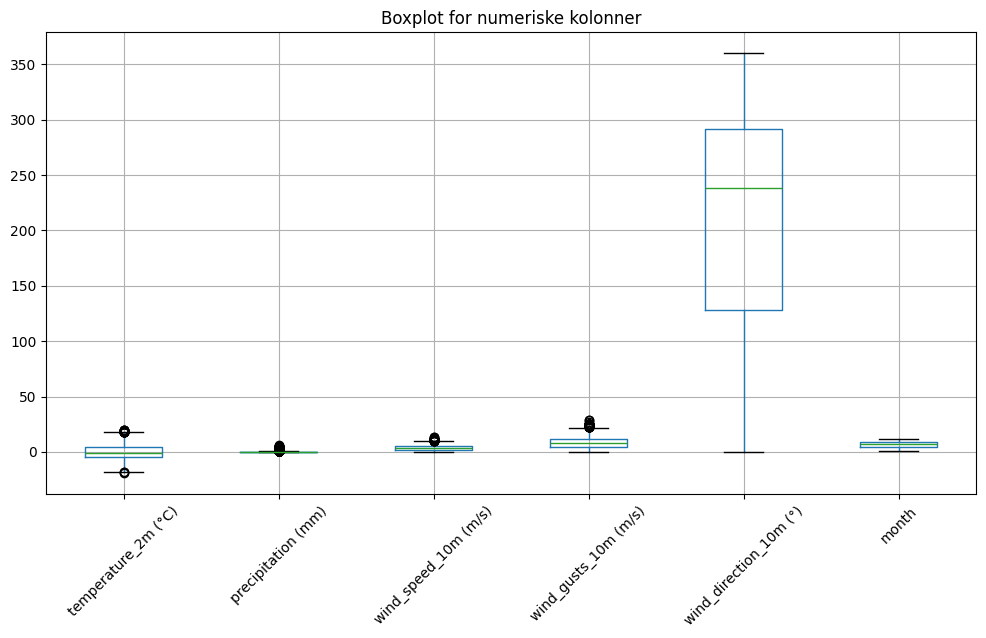

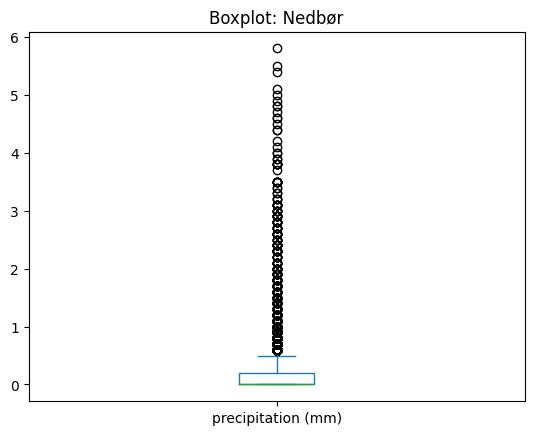

In [8]:
# Boxplot for alle numeriske kolonner
plt.figure(figsize=(12,6))
df.boxplot(rot=45)
plt.title("Boxplot for numeriske kolonner")
plt.show()

# Boxplot for én spesifikk kolonne
df["precipitation (mm)"].plot(kind="box", title="Boxplot: Nedbør")
plt.show()



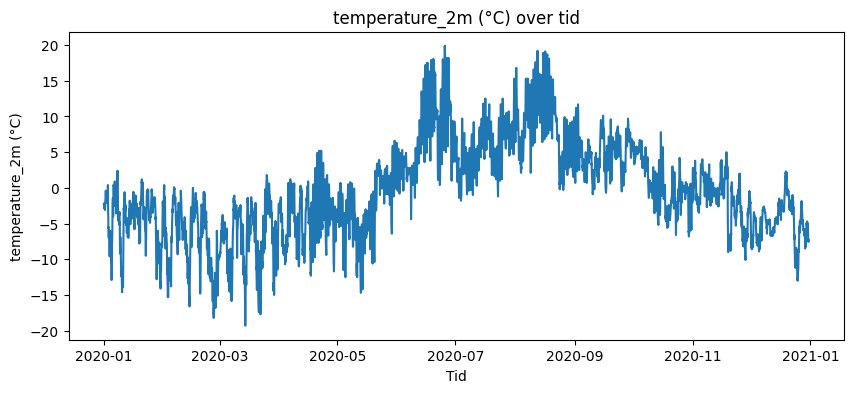

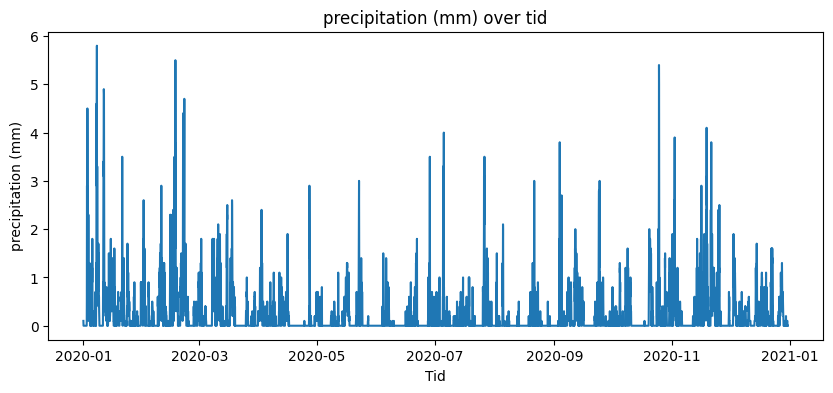

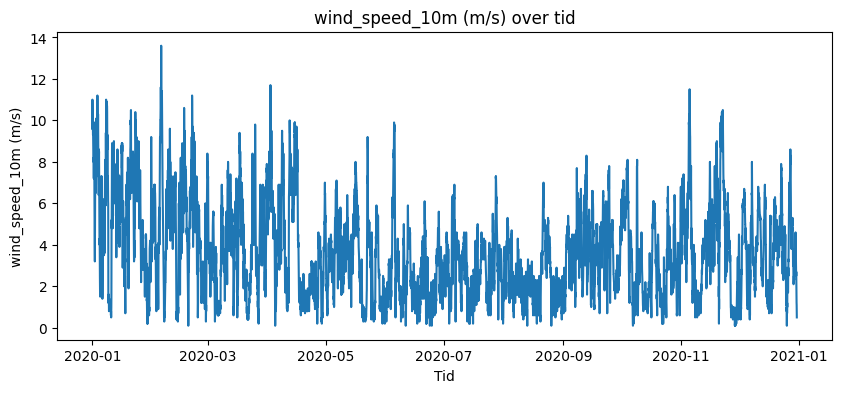

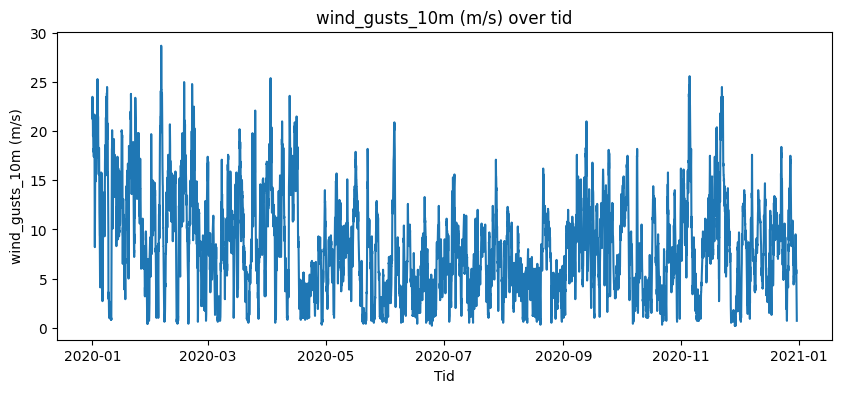

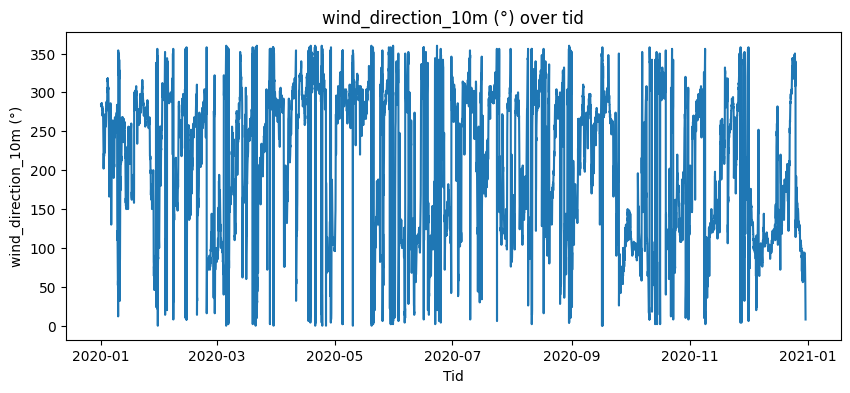

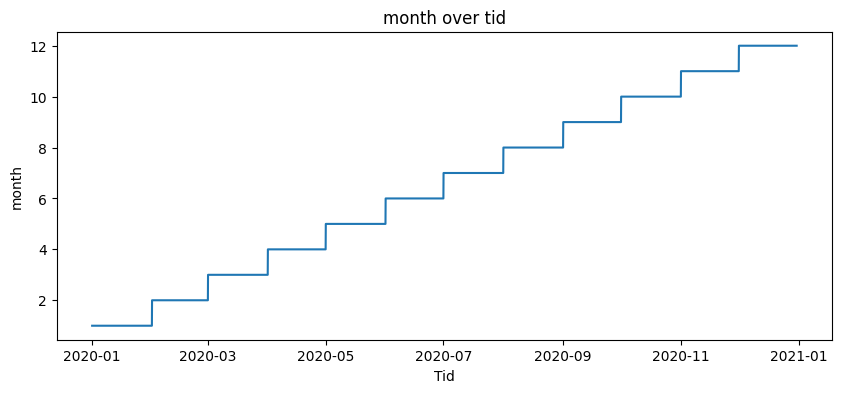

In [9]:
# Plot hver kolonne separat
for col in df.columns:
    if col != "time":  # hopp over tid hvis den finnes
        plt.figure(figsize=(10,4))
        plt.plot(df["time"], df[col])
        plt.title(f"{col} over tid")
        plt.xlabel("Tid")
        plt.ylabel(col)
        plt.show()

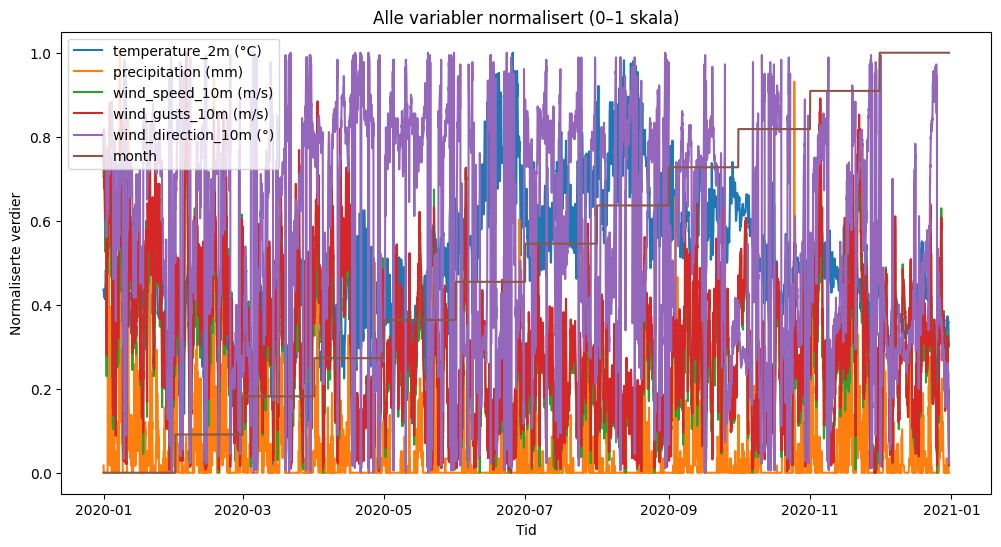

In [10]:
#Plot alle kolonner sammen (ulike skalaer) ---
# Normaliser verdiene (min-max scaling) slik at alt havner på [0,1]
df_norm = df.copy()
for col in df.columns:
    if col != "time":
        df_norm[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())

plt.figure(figsize=(12,6))
for col in df_norm.columns:
    if col != "time":
        plt.plot(df["time"], df_norm[col], label=col)

plt.title("Alle variabler normalisert (0–1 skala)")
plt.xlabel("Tid")
plt.ylabel("Normaliserte verdier")
plt.legend()
plt.show()